<a href="https://colab.research.google.com/github/Madhan-sukumar/NLP/blob/main/Movie%20Reviews%20Sentiment%20Analysis/Movie%20Reviews%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model
4. Train & finetune different ML models



Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

In [2]:
#viewing the current path
!pwd

/content


In [3]:
#setting the current environment
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
#downloading the dataset from kaggle
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 179MB/s]


In [5]:
#unzipping the zipped downloaded data
!unzip sentiment-analysis-on-movie-reviews -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [6]:
train_fname = '/content/data/train.tsv.zip'
test_fname = '/content/data/test.tsv.zip'
sub_fname = '/content/data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [7]:
import pandas as pd

In [8]:
#reading the data
raw_df= pd.read_csv(train_fname, sep='\t') 

In [9]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [11]:
raw_df.Phrase[:10].values

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose'],
      dtype=object)

In [12]:
#loading test dataframe
test_df = pd.read_csv(test_fname,sep='\t')
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


<Axes: >

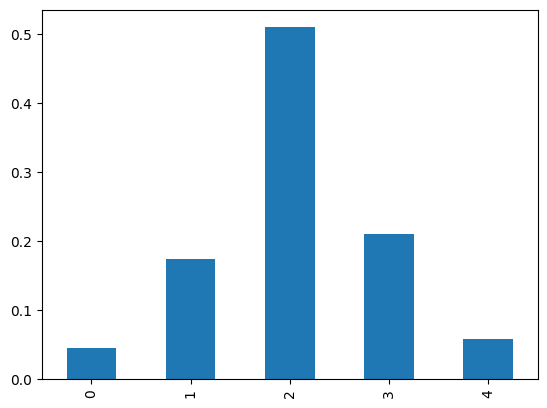

In [13]:
raw_df['Sentiment'].value_counts(normalize =True).sort_index().plot(kind='bar')

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive. From the above plot, can see that the neutral is more than other reviews.

The neutral reviews are more dominated and somewhat it is an imbalanced dataset

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

Countvectorizer vs TF-IIDF 

CountVectorizer only counts the number of times a word appears in the document, which results in biasing in favor of the most frequent words.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides a numerical representation of how important a word is for statistical analysis.

## Tokenizing and Stemming

In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
#stemming
from nltk.stem.snowball import SnowballStemmer

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
stemmer.stem('loving')

'love'

In [18]:
#Stemming the sentence after tokenized and punctuations are removed 
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [19]:
tokenize('i am loving this stories !')

['i', 'am', 'love', 'this', 'stori']

## Stop Words

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')

english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

the stop words contains negative emotional words like didn't, doesn't. These words are more important for setntiment analysis. so filtered out rest of the stop words for stop words removal 

In [29]:
selected_stopwords = english_stopwords[:115]
print(selected_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some']


# TF-IDF Vectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer= TfidfVectorizer(tokenizer=tokenize, stop_words =selected_stopwords,ngram_range=(1,2),max_features=2000)

In [31]:
#ftting the vectorizer to learn the frequency of occurence of words in trianing data
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7ff88db8e950>)

In [36]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [37]:
#transforming trianing data
inputs = vectorizer.transform(raw_df.Phrase)

In [38]:
inputs.shape

(156060, 2000)

In [40]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
#transforming the test data 
test_inputs= vectorizer.transform(test_df.Phrase)

In [42]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set. We are taking first 110000 rows for traning and remaining for validation, so we can measure how the model performed on remaining 46060 rows of validation set which is not seen and not taking random sample helps to make a model see only first 110000 but not random 110000 rows

In [45]:
raw_df.shape

(156060, 4)

In [43]:
Train_size = 110_000

In [44]:
#setting first 11000 rows as x train and y train
train_inputs = inputs[:Train_size]
train_targets = raw_df.Sentiment[:Train_size]

In [46]:
train_inputs.shape , train_targets.shape

((110000, 2000), (110000,))

In [47]:
#setting next 46060 rows for valdiation
val_inputs = inputs[Train_size:]
val_targets = raw_df.Sentiment[Train_size:]

In [48]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Logistic Regression Model



In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#prediction on training data
train_pred = lr.predict(train_inputs)

In [54]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [56]:
#accuracy on training data prediction
from sklearn.metrics import accuracy_score

train_pred_accuracy = accuracy_score(train_targets,train_pred)
print(train_pred_accuracy)

0.6381818181818182


In [57]:
# prediction on validation data
val_pred = lr.predict(val_inputs)
val_pred

array([2, 0, 0, ..., 2, 2, 2])

In [58]:
#accuracy on validation dataset
val_pred_accuracy = accuracy_score(val_targets,val_pred)
print(val_pred_accuracy)

0.5795049934867564


### Prediction On Test Data

In [60]:
lr.predict(test_inputs)

array([3, 3, 2, ..., 2, 2, 1])

## Train & Finetune Different ML Models




### RandomForest Classifier

In [62]:
#fitting and training the model
from sklearn.ensemble import RandomForestClassifier

rf_classifier  = RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_classifier.fit(train_inputs,train_targets)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [64]:
train_pred_rf = rf_classifier.predict(train_inputs)

In [66]:
train_pred_acc_rf = accuracy_score(train_targets,train_pred_rf)
print(train_pred_acc_rf)

0.7902727272727272


In [67]:
#prediction on validation set
val_pred_rf = rf_classifier.predict(val_inputs)

In [68]:
val_pred_acc_rf = accuracy_score(val_targets,val_pred_rf)
print(val_pred_acc_rf)

0.560790273556231


In [76]:
from sklearn.metrics import classification_report


report=classification_report(val_targets,val_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.10      0.16      2135
           1       0.47      0.29      0.36      8613
           2       0.62      0.83      0.71     22740
           3       0.45      0.41      0.43      9708
           4       0.43      0.10      0.16      2864

    accuracy                           0.56     46060
   macro avg       0.47      0.35      0.36     46060
weighted avg       0.53      0.56      0.52     46060



From the accuracy score on training data and validation data we can see that the training accuracy is 0.79 and validation accuracy is 0.56. From this we can see that the model is somewhat overfitted but we can use different hyperparamter tuning methods to reduce overfitting.

## Naive Bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
nb_model = MultinomialNB()

In [89]:
#fitting the data
nb_model.fit(train_inputs,train_targets)

MultinomialNB()

In [90]:
#prediction on trian data
train_pred_nb = nb_model.predict(train_inputs)

In [91]:
train_pred_acc_nb = accuracy_score(train_targets,train_pred_nb)
print(train_pred_acc_nb)

0.5848363636363636


In [93]:
#prediction on validation data
val_pred_nb = nb_model.predict(val_inputs)

In [94]:
#accuracy score of validation data prediction
val_pred_acc_nb = accuracy_score(val_targets,val_pred_nb)
print(val_pred_acc_nb)

0.5429005644811116


While using Multinomial Naives bayes classifer, we achieved an training accuracy of 0.58 and accuracy on validation set is 0.54, In this the model is not overfitted but we can use different hyperparameters tuning methods to increase the accuracy.


#### From all three models, conclusively Logistic Regression model was performed better 